# DATA SCIENCE WITH PYTHON CERTIFICATION COURSE 
# Certification Project
## USED CARS PRICE PREDICTION

1. Data Loading and Exploration
Objective: Understand the dataset structure and check for inconsistencies or null values.

2. Exploratory Data Analysis (EDA)
Objective: Analyze data distributions, relationships, and identify outliers.

3. Data Preprocessing
Objective: Prepare the data for modeling by handling redundancy, scaling, and encoding.

4. Model Development
Objective: Train and evaluate regression models to predict car prices.

5. Results and Comparison
Objective: Summarize and compare model performance, with and without outlier removal.

6. Recommendations
Objective: Provide insights for deployment and future improvements.


In [1]:
# Step 1: Data Loading and Exploration
# Objective: Understand the structure and content of the dataset.
# Actions:
# Load the dataset and check for null values or data inconsistencies.
# Inspect data types and convert them if necessary.

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the data
file_path = 'cars.csv'
data = pd.read_csv(file_path)

# Display basic information about the data
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


(None,
    Id  year          brand                                    full_model_name  \
 0   0  2016          Honda                                    Honda Brio S MT   
 1   1  2012         Nissan                             Nissan Sunny XV Diesel   
 2   2  2017         Toyota             Toyota Fortuner 2.8 4x2 MT [2016-2020]   
 3   3  2017  Mercedes-Benz  Mercedes-Benz E-Class E 220d Expression [2019-...   
 4   4  2012        Hyundai                  Hyundai Verna Fluidic 1.6 CRDi SX   
 
   model_name      price  distance_travelled(kms) fuel_type    city  \
 0       Brio   425000.0                   9680.0    Petrol  Mumbai   
 1      Sunny   325000.0                 119120.0    Diesel  Mumbai   
 2   Fortuner  2650000.0                  64593.0    Diesel   Thane   
 3    E-Class  4195000.0                  25000.0    Diesel  Mumbai   
 4      Verna   475000.0                  23800.0    Diesel  Mumbai   
 
    brand_rank  car_age  
 0           7      5.0  
 1          11     

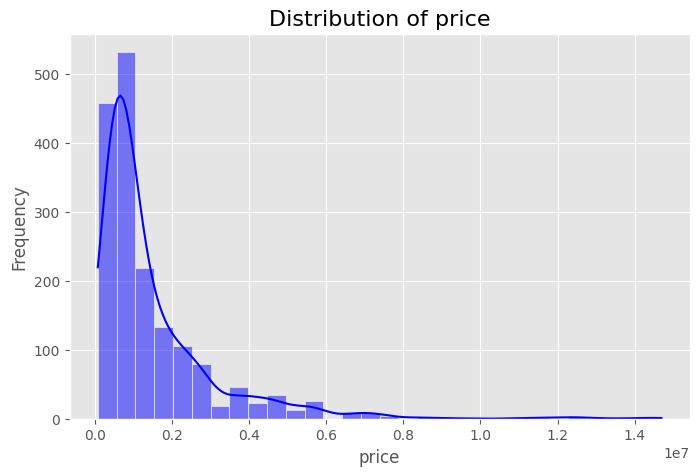

price :  count    1.725000e+03
mean     1.494837e+06
std      1.671658e+06
min      6.250000e+04
25%      5.450000e+05
50%      8.750000e+05
75%      1.825000e+06
max      1.470000e+07
Name: price, dtype: float64


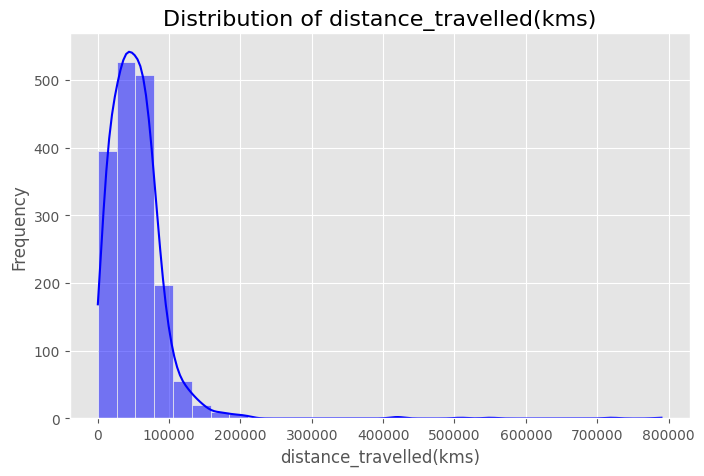

distance_travelled(kms) :  count      1725.000000
mean      53848.256232
std       44725.541963
min         350.000000
25%       29000.000000
50%       49000.000000
75%       70500.000000
max      790000.000000
Name: distance_travelled(kms), dtype: float64


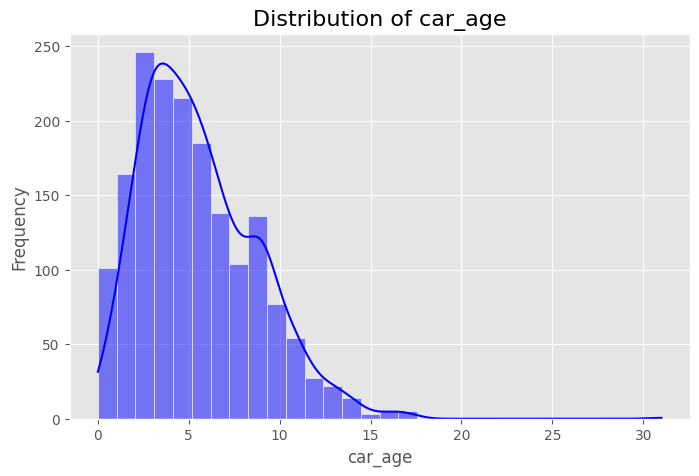

car_age :  count    1725.000000
mean        5.609275
std         3.207504
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        31.000000
Name: car_age, dtype: float64


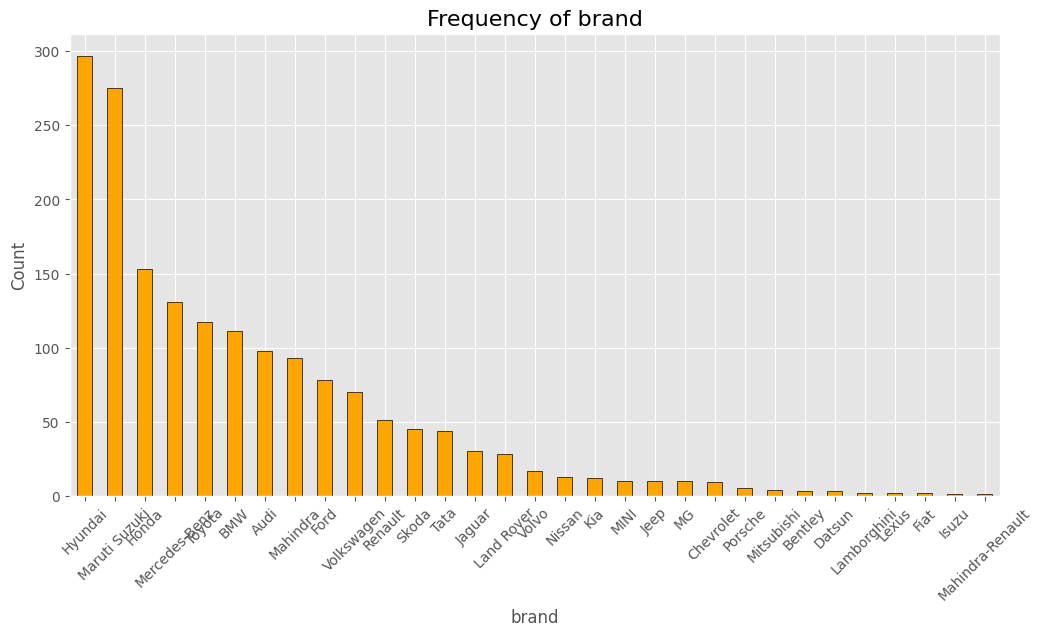

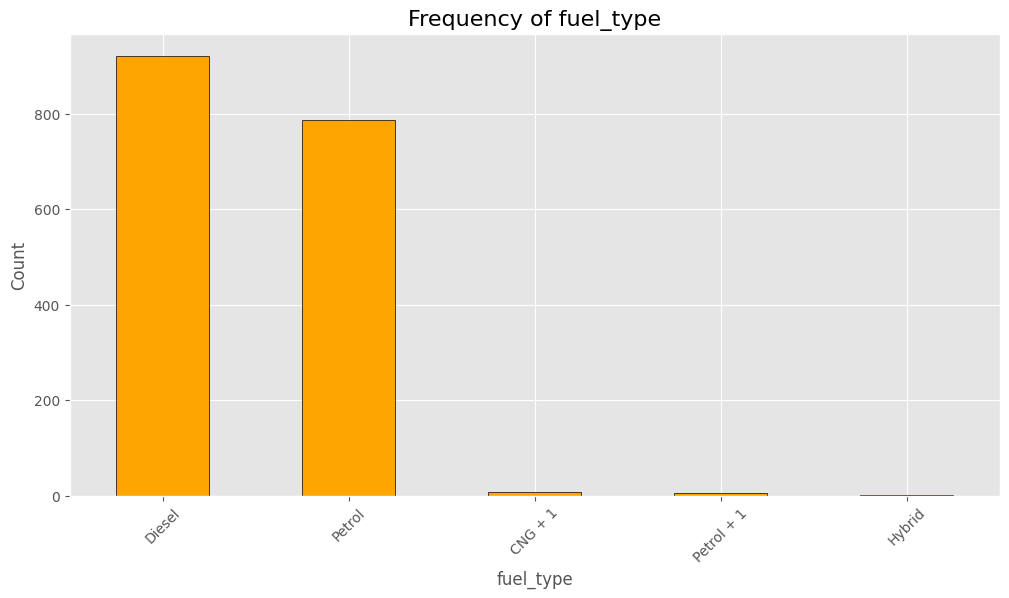

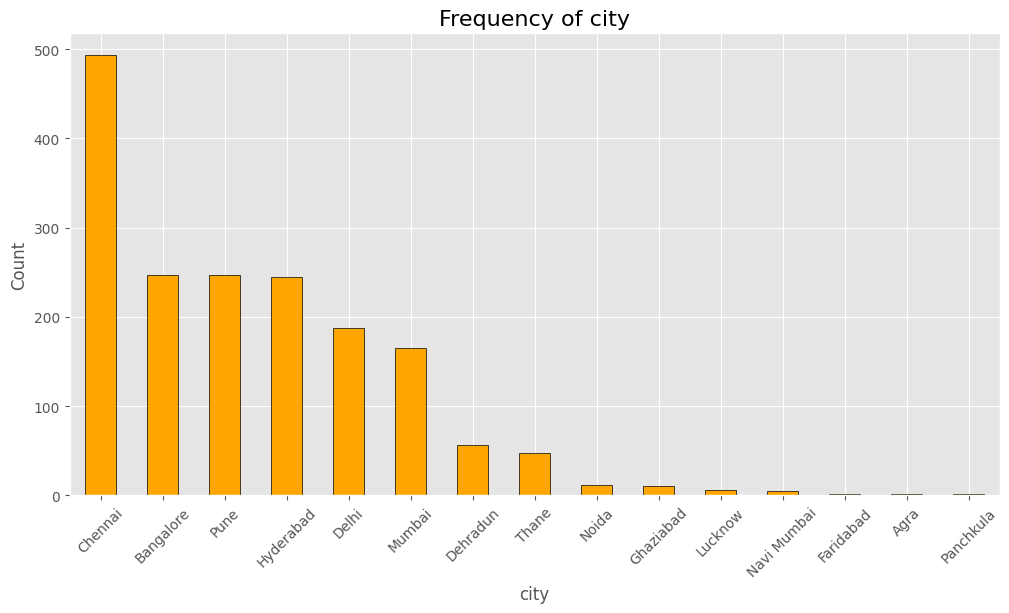

In [2]:
# Step 2: Exploratory Data Analysis (EDA)
# Objective: Gain insights into the data and identify patterns or anomalies.
# Actions:
# Perform Univariate Analysis:
# Analyze the distribution of numerical variables (e.g., price, distance_travelled(kms), car_age).
# Inspect categorical variables (e.g., brand, fuel_type, city).
# Perform Multivariate Analysis:
# Determine correlations between numerical features.
# Explore relationships between the target variable (price) and other features.

import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style
plt.style.use('ggplot')

# Univariate Analysis: Plotting the distribution of key numerical variables
numerical_columns = ['price', 'distance_travelled(kms)', 'car_age']

# Plot histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()
    print(col,': ', data[col].describe() )

# Bar plot for categorical variables: 'brand', 'fuel_type', and 'city'
categorical_columns = ['brand', 'fuel_type', 'city']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    data[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f'Frequency of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()




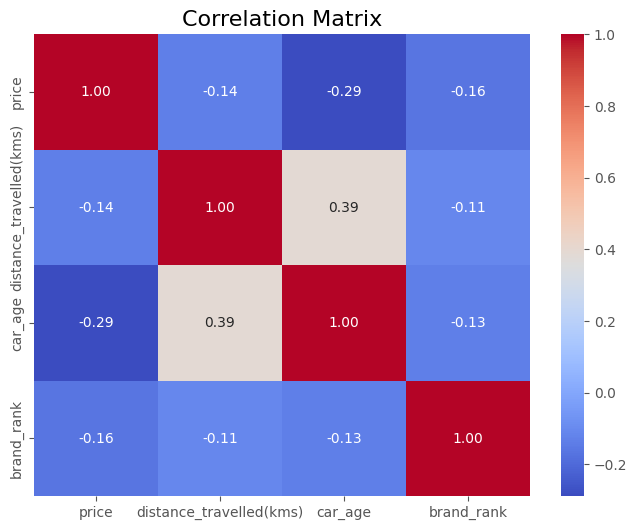

corr_matrix:                              price  distance_travelled(kms)   car_age  \
price                    1.000000                -0.137351 -0.288483   
distance_travelled(kms) -0.137351                 1.000000  0.386107   
car_age                 -0.288483                 0.386107  1.000000   
brand_rank              -0.164591                -0.111406 -0.134275   

                         brand_rank  
price                     -0.164591  
distance_travelled(kms)   -0.111406  
car_age                   -0.134275  
brand_rank                 1.000000  


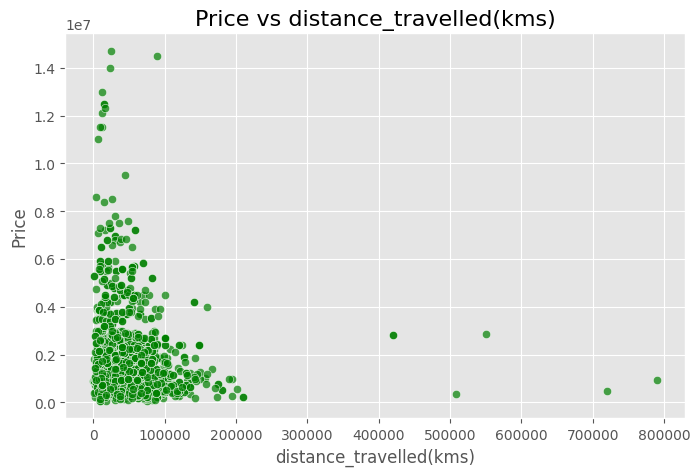

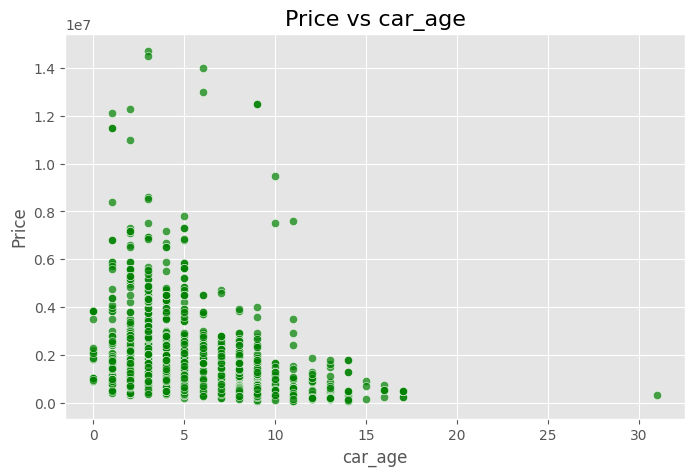

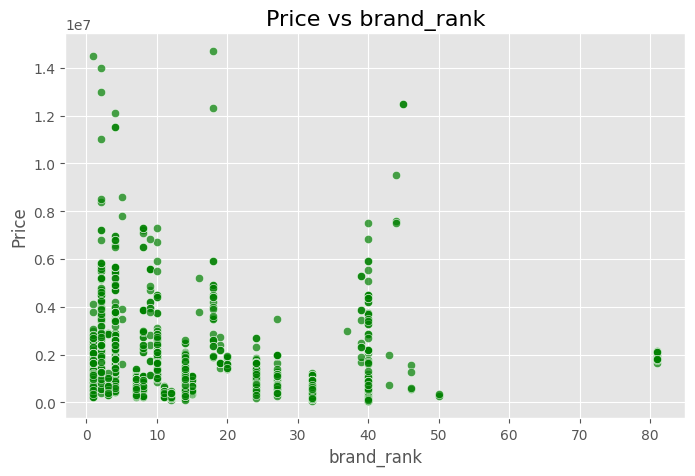

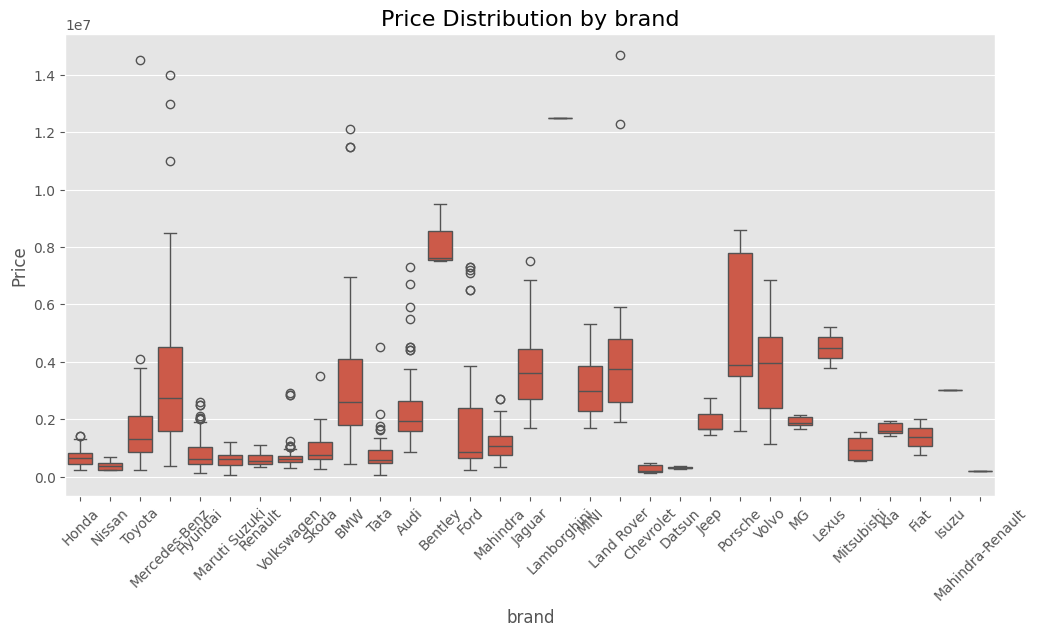

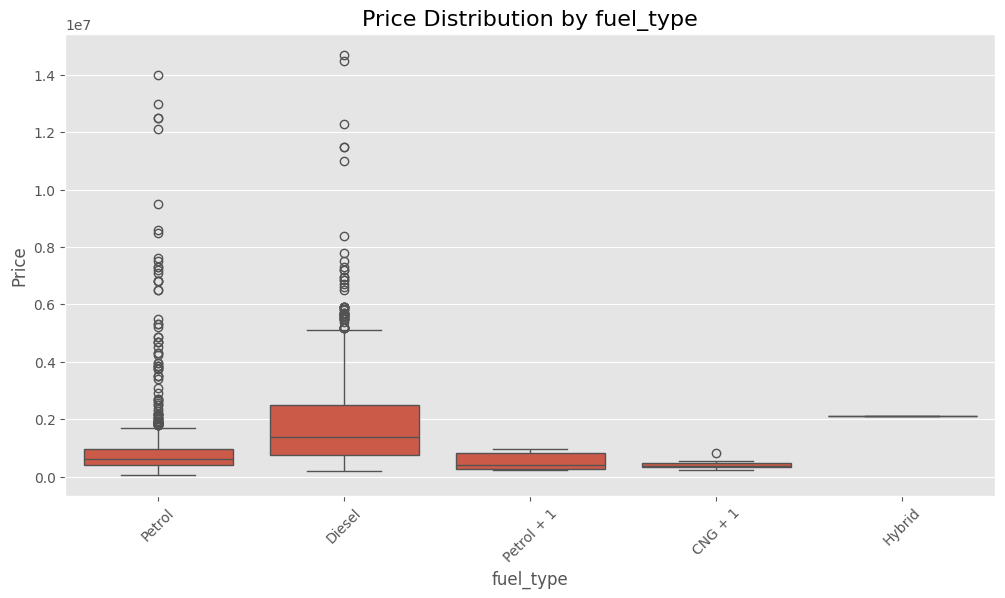

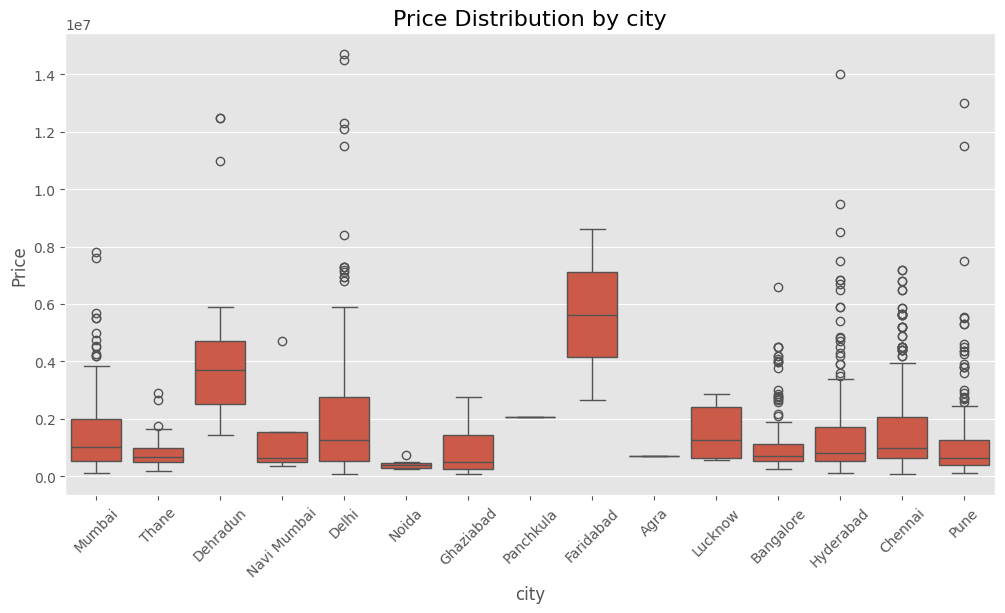

In [3]:
# Multivariate Analysis: Correlation matrix for numerical features
plt.figure(figsize=(8, 6))
corr_matrix = data[['price', 'distance_travelled(kms)', 'car_age', 'brand_rank']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()
print('corr_matrix: ', corr_matrix)

# Scatter plots to analyze relationships with `price`
numerical_columns = ['distance_travelled(kms)', 'car_age', 'brand_rank']
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[col], y=data['price'], alpha=0.7, color='green')
    plt.title(f'Price vs {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.show()

# Box plots for categorical features vs `price`
categorical_columns = ['brand', 'fuel_type', 'city']
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[col], y=data['price'])
    plt.title(f'Price Distribution by {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()


In [4]:
# Step 3: Data Preprocessing to prepare the data for modeling. This includes:
# Encoding categorical features.
# Scaling numerical features.
# Splitting the data into training and testing sets.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
X = data.drop(columns=['Id', 'price', 'full_model_name', 'year']) # year is redundant with car_age
y = data['price']

# Identify categorical and numerical features
categorical_features = ['brand', 'fuel_type', 'city', 'model_name']
numerical_features = ['distance_travelled(kms)', 'car_age', 'brand_rank']

# Define preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and test data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display the preprocessed training data shape as confirmation
X_train_preprocessed.shape, X_test_preprocessed.shape

# The training dataset has 1380 samples with 216 features after encoding and scaling.
# The test dataset has 345 samples with the same number of features.


((1380, 215), (345, 215))

In [5]:
# Feature Preprocessing & Importance using RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
# Fit a RandomForestRegressor for feature importance extraction
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_preprocessed, y_train)

# Extract feature importances
if hasattr(rf_model, "feature_importances_"):
    # Combine numerical and categorical feature names
    feature_names = (
        numerical_features +
        list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
    )
    feature_importances = rf_model.feature_importances_

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": feature_importances
    }).sort_values(by="Importance", ascending=False)

# Display the top 5 important features
importance_df.head(5)

,Feature,Importance
1,car_age,0.159081
2,brand_rank,0.108273
0,distance_travelled(kms),0.053934
142,model_name_Land,0.044343
148,model_name_Mustang,0.044211


In [6]:
# Step 4: Model Development
# Objective: Train multiple regression models and evaluate their performance.
# Actions:
# Train different regression models:
# Linear Regression
# Ridge and Lasso Regression
# Decision Trees
# Random Forest
# Evaluate models using metrics like RMSE, MAE, and R² on the hold-out/test dataset.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Define metrics for evaluation
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorers = {
    "RMSE": make_scorer(rmse_scorer, greater_is_better=False),
    "MAE": make_scorer(mean_absolute_error, greater_is_better=False),
    "R^2 Score": make_scorer(r2_score),
}

# Perform Grid Search for Random Forest Regressor
def grid_search_random_forest(X, y):
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',  # Use a standard scoring metric
        verbose=1,
        n_jobs=-1
    )

    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_estimator_

# Dictionary to store model performances
model_performance = {}

# Train, cross-validate, and evaluate models
for name, model in models.items():
    if name == "Random Forest Regressor":
        # Perform grid search for Random Forest
        best_params, best_model = grid_search_random_forest(X_train_preprocessed, y_train)
        print(f"Best Parameters for {name}: {best_params}")
        model = best_model

    # Cross-validate predictions
    scores = {
        "RMSE": -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=scorers["RMSE"]).mean(),
        "MAE": -cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=scorers["MAE"]).mean(),
        "R^2 Score": cross_val_score(model, X_train_preprocessed, y_train, cv=5, scoring=scorers["R^2 Score"]).mean()
    }

    # Store the results
    model_performance[name] = scores

# Metrics Explanation
metrics_explanation = {
    "RMSE": "Root Mean Squared Error: Indicates the average deviation of predictions from actual values. Lower is better.",
    "MAE": "Mean Absolute Error: Average of absolute differences between predictions and actual values. Lower is better.",
    "R^2 Score": "R-squared: Proportion of variance explained by the model. Higher is better, with 1 being perfect."
}

# Display model performances
performance_df = pd.DataFrame(model_performance).T
print("Metrics Explanation:")
for metric, explanation in metrics_explanation.items():
    print(f"{metric}: {explanation}")

print("\nModel Performance Comparison:")
print(performance_df)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Metrics Explanation:
RMSE: Root Mean Squared Error: Indicates the average deviation of predictions from actual values. Lower is better.
MAE: Mean Absolute Error: Average of absolute differences between predictions and actual values. Lower is better.
R^2 Score: R-squared: Proportion of variance explained by the model. Higher is better, with 1 being perfect.

Model Performance Comparison:
                                  RMSE            MAE  R^2 Score
Linear Regression        802915.144311  417607.955396   0.743489
Ridge Regression         817812.646832  426461.454359   0.735326
Lasso Regression         809431.434431  414732.073671   0.737895
Random Forest Regressor  729564.988992  264239.122628   0.785909


In [7]:
# Evaluate the best model (Random Forest) on the test dataset
best_model.fit(X_train_preprocessed, y_train)
y_test_pred = best_model.predict(X_test_preprocessed)

# Compute metrics on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display test set performance
print("\nTest Set Performance:")
print(f"RMSE: {test_rmse:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"R^2 Score: {test_r2:.4f}")


Test Set Performance:
RMSE: 943332.31
MAE: 309343.51
R^2 Score: 0.7349


In [8]:

# Interpretation of Test Set Performance:
# RMSE (Root Mean Squared Error):

# 946,724.26 indicates that, on average, the model's predictions deviate from the actual price by approximately ₹946,724.
# This suggests that the model is making reasonable predictions but has room for improvement, especially for high-priced cars.
# MAE (Mean Absolute Error):

# 311,227.51 represents the average absolute difference between predicted and actual prices.
# This is a better indicator for understanding the typical prediction error in monetary terms.
# R² Score (Coefficient of Determination):

# 0.7330 shows that approximately 73.3% of the variance in car prices is explained by the model.
# While this is a solid performance, there is still room to capture additional variance by refining the model or using more features.

# Comparison with Training Metrics:
# The RMSE and MAE on the test set are slightly higher than the training set, which is expected due to the unseen nature of the test data.
# The R² Score has a small drop from 0.785 (training) to 0.733 (test), indicating a mild degree of overfitting.

